In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
import plotly.express as px

In [23]:
df = pd.read_csv("data/diabetes.csv")

In [24]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [25]:
df_box = df[["Glucose","BloodPressure","SkinThickness","BMI","Age"]]
df_box2 = df[["Insulin"]]
df_box3 = df[["Pregnancies"]]
df_box4 = df[["DiabetesPedigreeFunction"]]

In [26]:
fig = px.box(df_box)
fig.show()

In [27]:
fig = px.box(df_box2)
fig.show()

In [28]:
fig = px.box(df_box3)
fig.show()

In [29]:
fig = px.box(df_box4)
fig.show()

In [5]:
count_outcome= df.Outcome.value_counts() # count non-diabetes and diabetes values in pandas series
count_outcome = count_outcome.rename({0: "Non Diabetes", 1: "Diabetes"}) # rename pandas series indices
fig = px.bar(count_outcome,text="value") # add "text='value'" to show the number of each labes
fig.show()

1 for Diabetes, 0 for Non-Diabetes
0    500
1    268
Name: Outcome, dtype: int64
0    0.651042
1    0.348958
Name: Outcome, dtype: float64


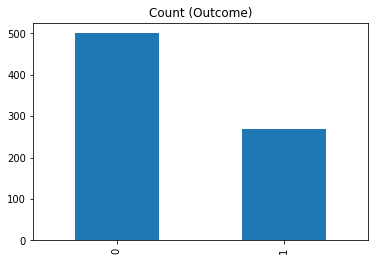

In [4]:
print("1 for Diabetes, 0 for Non-Diabetes")
print(df.Outcome.value_counts())
print(df.Outcome.value_counts()/len(df.Outcome))

df.Outcome.value_counts().plot(kind='bar',title='Count (Outcome)');

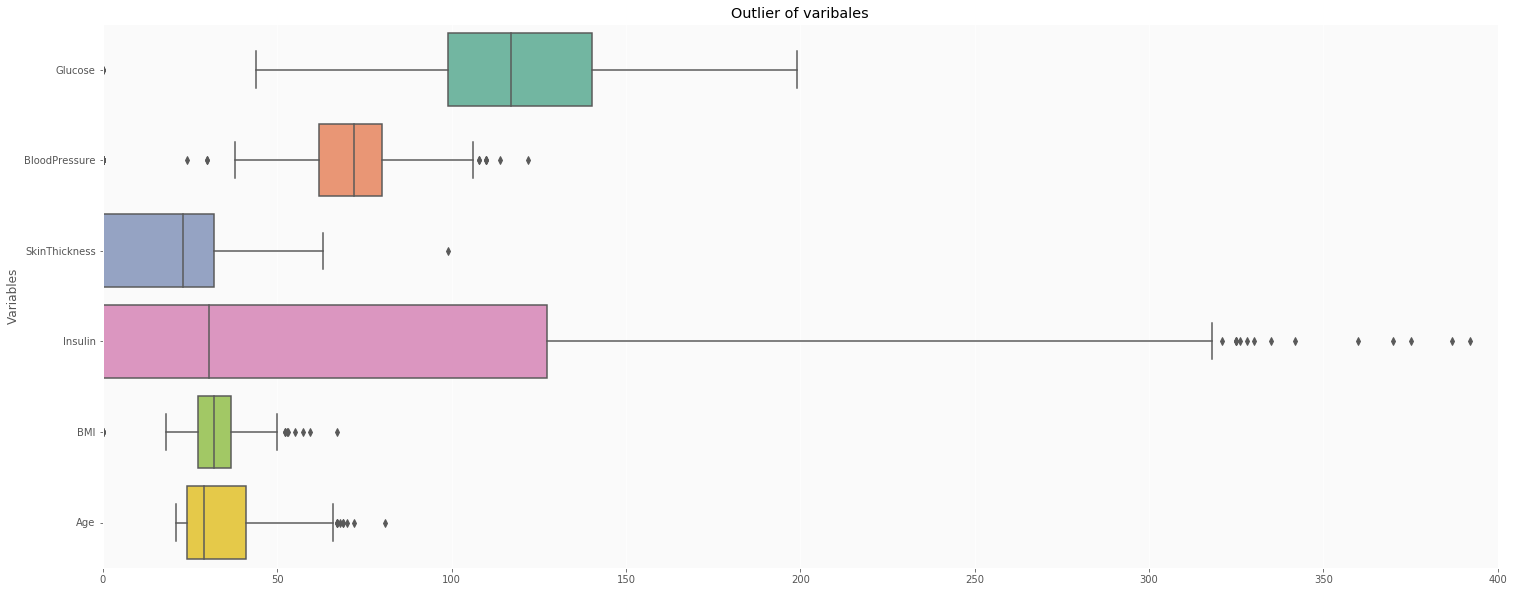

In [5]:
# Outlier

plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(25, 10))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 400))
plt.ylabel('Variables')
plt.title("Outlier of varibales")
ax = sns.boxplot(data = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]], 
  orient = 'h', 
  palette = 'Set2')

In [6]:
corr_matrix =df.corr()
# To show onlly the lower triangle half matrix because the upper one is the symmetrial to the lower one.

# np.zeros_llike() returns an array of zeros with the same shape and type as the given array
# dtype=np.bool overrides the data type and returns an array of booleans.
masks = np.zeros_like(corr_matrix,dtype=np.bool)
# np.triu_indices_from(mask) returns the indices for the upper triangle of the array.
masks[np.triu_indices_from(masks)]= True


Correlation Matrix


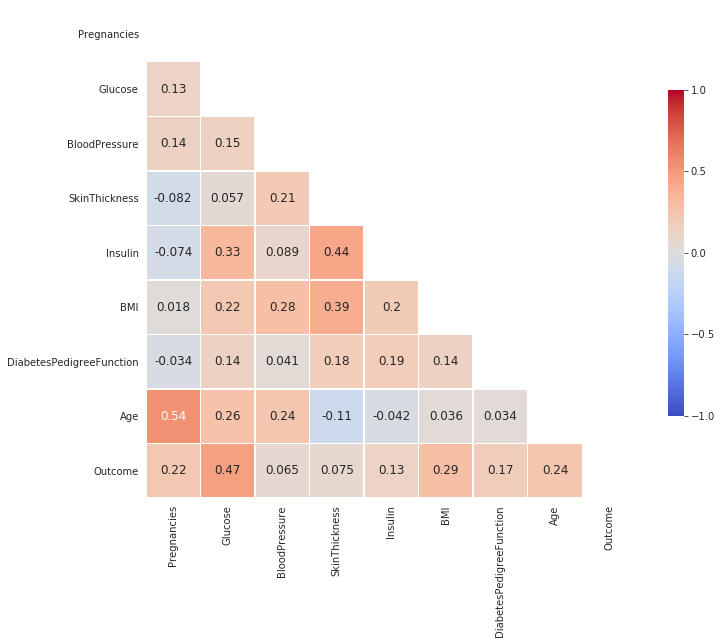

In [7]:
with sns.axes_style("white"):
    f, ax = f, ax = plt.subplots(figsize =(11,15))
    ax =sns.heatmap(corr_matrix, mask = masks, square = True,linewidths = .5,cmap = "coolwarm",
                     cbar_kws ={"shrink": .4, "ticks": [-1,-.5,0,0.5,1]}, vmin =-1, vmax =1, annot = True, annot_kws ={"size": 12})


# making coluns names as labels
ax.set_yticklabels(corr_matrix.columns, rotation =0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({"xtick.bottom":True},{"ytick.left": True})
print("Correlation Matrix")

In [8]:
df_copy = df.copy()

In [9]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df_copy.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [11]:
# to check if there are any ZERO values

for i in df_copy.columns.values:
    df_copy[i].replace(0, np.nan, inplace= True)

In [12]:
df_copy.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
df_copy.isnull().mean()

Pregnancies                 0.144531
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.651042
dtype: float64

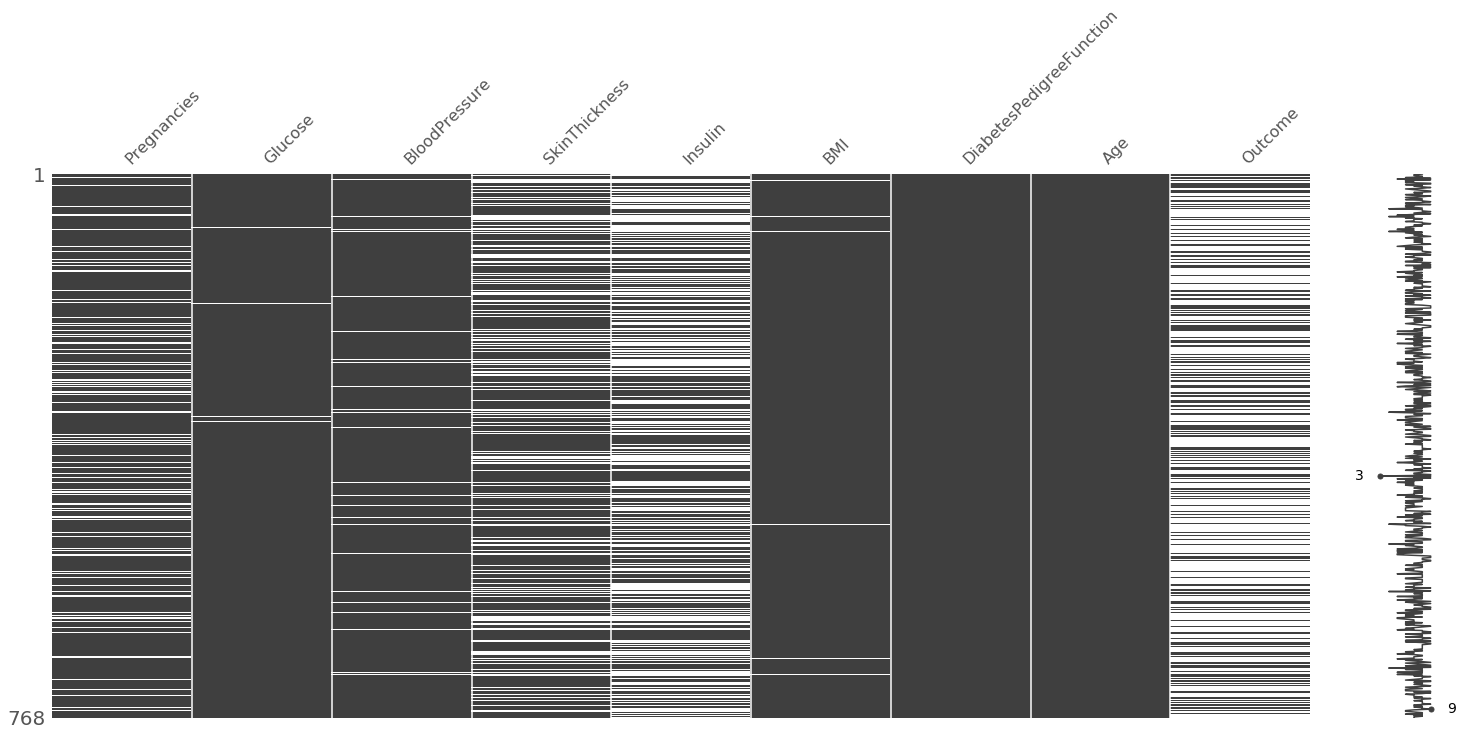

In [14]:
msno.matrix(df_copy)

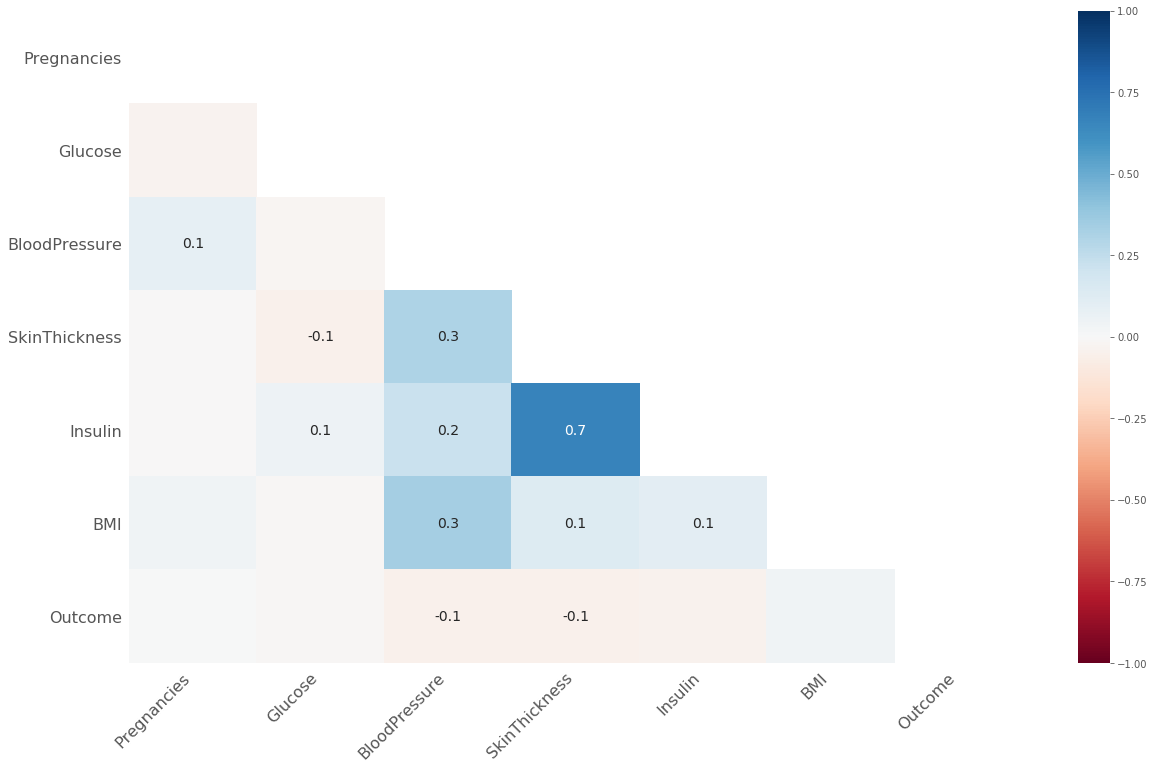

In [15]:
# measures nullity correlation:
# how strongly the presence or absence of one variable affects the presence of another:

msno.heatmap(df_copy)

MNAR:Skin Thickness and Insulin values' are missing not at random.


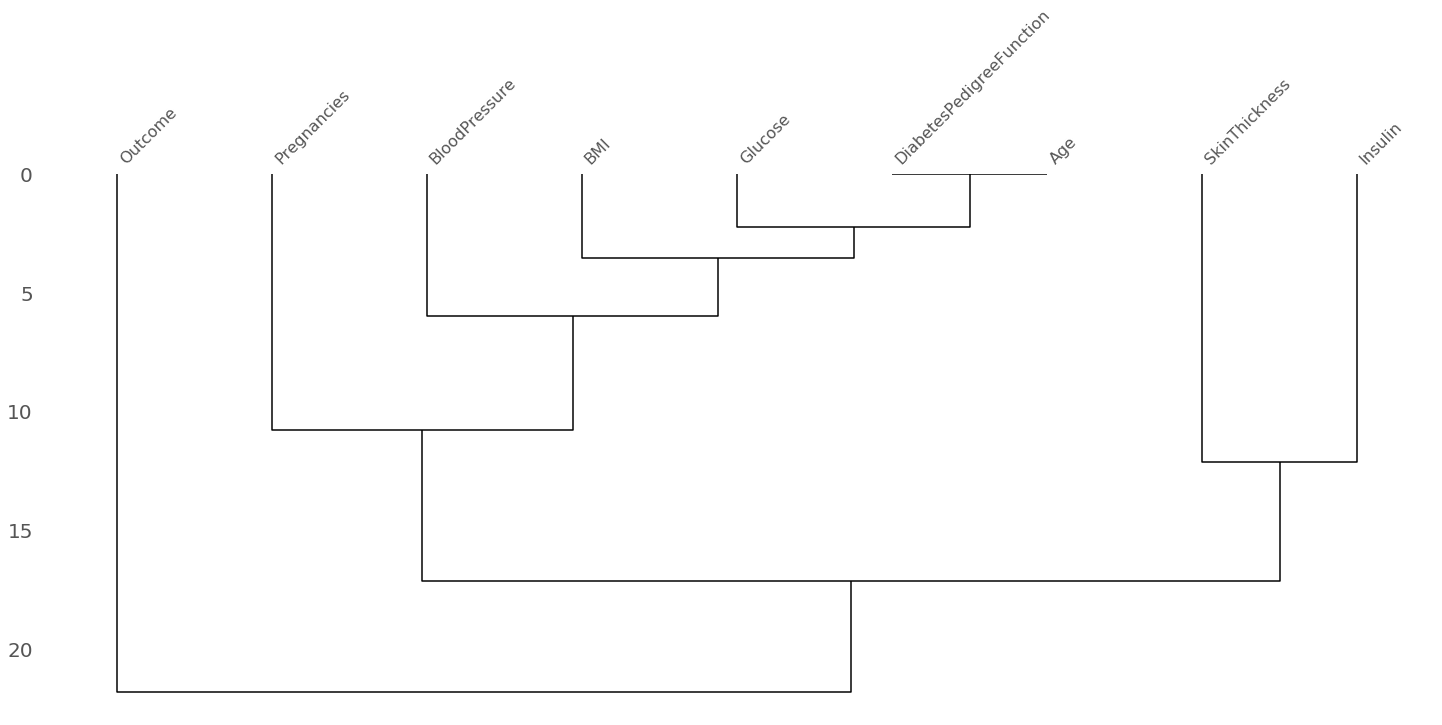

In [60]:
msno.dendrogram(df_copy)
print("MNAR:Skin Thickness and Insulin values' are missing not at random.")

In [17]:
missing_insulin =df["Insulin"].isin(["0"]).sum()
missing_skinthickness = df["SkinThickness"].isin(["0"]).sum()

print("the number of missing value of Insulin:",missing_insulin)
print("the number of missing value of SKinThickness", missing_skinthickness)

the number of missing value of Insulin: 374
the number of missing value of SKinThickness 227


In [18]:
missing_skinthickness

227

In [19]:
missing_skinthickness_df= df[df["SkinThickness"].isin(["0"])]
missing_insulin_df= df[df["Insulin"].isin(["0"])]

In [20]:
missing_skinthickness_index=missing_skinthickness_df.index
missing_insulin_index=missing_insulin_df.index

In [21]:
matched_index=set(missing_skinthickness_index) & set(missing_insulin_index)
print(len(matched_index))

227


In [22]:
matched_index2=set(missing_skinthickness_index) & set(matched_index)
print(len(matched_index2))

227


In [23]:
# SET:cannot have multiple occurrences of the same element and store unordered values.

matched_index_sum =sum(matched_index)
print(matched_index)
print(len(matched_index))

{512, 513, 2, 517, 5, 7, 518, 9, 10, 11, 12, 522, 523, 15, 524, 17, 529, 531, 21, 22, 533, 535, 536, 26, 537, 29, 33, 36, 552, 41, 44, 557, 46, 559, 560, 49, 564, 58, 570, 60, 61, 62, 571, 64, 577, 578, 67, 583, 72, 586, 587, 76, 589, 78, 592, 81, 84, 596, 598, 601, 90, 604, 93, 100, 101, 102, 615, 104, 616, 106, 619, 622, 624, 113, 626, 115, 116, 117, 627, 628, 630, 632, 634, 123, 124, 635, 636, 129, 641, 131, 642, 643, 138, 140, 653, 143, 658, 148, 660, 151, 154, 674, 675, 164, 676, 677, 167, 168, 678, 170, 683, 684, 686, 176, 178, 179, 180, 690, 691, 183, 184, 694, 697, 699, 190, 703, 192, 193, 706, 196, 708, 201, 714, 207, 724, 728, 729, 219, 731, 221, 222, 734, 226, 739, 230, 743, 233, 235, 749, 750, 239, 242, 757, 246, 758, 759, 250, 251, 762, 766, 261, 264, 266, 268, 269, 272, 274, 278, 280, 283, 284, 294, 299, 300, 303, 304, 317, 319, 327, 332, 333, 336, 337, 339, 343, 344, 347, 350, 351, 354, 355, 361, 363, 366, 378, 391, 394, 398, 400, 401, 404, 406, 407, 408, 418, 426, 430, 

In [24]:
# Feature Engineering
# Creating new column for "Missing Not At Random" as "MNAR". 
# When Insulin is missing, SkinThickness is definetely missing.
# Using SkinThickenss' indices, creating new columns.

df.loc[(df["SkinThickness"] == 0 ), "MNAR"] = 1
df.loc[(df["SkinThickness"] >=1 ), "MNAR"] = 0
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,MNAR
0,6,148,72,35,0,33.6,0.627,50,1,0.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,0.0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0.0
764,2,122,70,27,0,36.8,0.340,27,0,0.0
765,5,121,72,23,112,26.2,0.245,30,0,0.0
766,1,126,60,0,0,30.1,0.349,47,1,1.0


In [25]:
df_columns=['Glucose','BloodPressure',"BMI"]
for i in df_columns:
    df[i].replace(0, np.nan, inplace= True)

In [26]:
df.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
MNAR                         0
dtype: int64

In [27]:
# Function to calculate Median according to the Outcome

def check_median(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [28]:
check_median("Glucose")

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [29]:
check_median("BloodPressure")

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [30]:
check_median("BMI")

,Outcome,BMI
0,0,30.1
1,1,34.3


In [31]:
# Filling the NaN value with Median according to Output

df.loc[(df['Outcome'] == 0 ) & (df["Glucose"].isnull()), "Glucose"] = 107
df.loc[(df['Outcome'] == 1 ) & (df["Glucose"].isnull()), "Glucose"] = 140

df.loc[(df['Outcome'] == 0 ) & (df["BloodPressure"].isnull()), "BloodPressure"] = 70
df.loc[(df['Outcome'] == 1 ) & (df["BloodPressure"].isnull()), "BloodPressure"] = 74.5

df.loc[(df['Outcome'] == 0 ) & (df["BMI"].isnull()), "BMI"] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df["BMI"].isnull()), "BMI"] = 34.3

In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
MNAR                        0
dtype: int64

# BMI
BMI Categories: Underweight = <18.5 Normal weight = 18.5–24.9 Overweight = 25–29.9 Obesity = BMI of 30 or greater

reference https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi-m.htm

In [33]:
def bmi_cl(df):
    if 0<= df['BMI']<=18.5:
        return 'Underweight '
    elif 18.6 <= df['BMI']<=24.9:
        return "Normal weight"
    elif 25 <= df["BMI"]<=29.9:
        return "Overweight"
    elif df["BMI"]>=30:
        return "Obesity"
df['BMI_group'] = df.apply(lambda df: bmi_cl(df), axis=1)

# Glucose
Glucose below 140 is nomal , 140 mg/dL and 199 is prediabetes, over 200 is considered as diabeties
reference https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451

In [34]:
def glucose_cl(df):
    if 0<= df['Glucose']<=139:
        return 'Normal'
    elif 140 <=df["Glucose"]<=199:
        return "Pre Diabetes"

df['Glucose_group'] = df.apply(lambda df: glucose_cl(df), axis=1)

In [35]:
df.loc[(df["Pregnancies"] == 0), "Pregnancies_MoreThanOnce"] = "0"
df.loc[(df["Pregnancies"] >= 1), "Pregnancies_MoreThanOnce"] = "1"

In [36]:
df = pd.get_dummies(df,columns=["BMI_group","Glucose_group"])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,MNAR,Pregnancies_MoreThanOnce,BMI_group_Normal weight,BMI_group_Obesity,BMI_group_Overweight,BMI_group_Underweight,Glucose_group_Normal,Glucose_group_Pre Diabetes
0,6,148.0,72.0,35,0,33.6,0.627,50,1,0.0,1,0,1,0,0,0,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0,0.0,1,0,0,1,0,1,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1,1.0,1,1,0,0,0,0,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0,0.0,1,0,0,1,0,1,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1,0.0,0,0,1,0,0,1,0


In [37]:
df.loc[(df["Outcome"] == 0), "Outcome2"] =1
df.loc[(df["Outcome"] == 1), "Outcome2"] =0

In [38]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'MNAR',
       'Pregnancies_MoreThanOnce', 'BMI_group_Normal weight',
       'BMI_group_Obesity', 'BMI_group_Overweight', 'BMI_group_Underweight ',
       'Glucose_group_Normal', 'Glucose_group_Pre Diabetes', 'Outcome2'],
      dtype='object')

In [39]:
# Change colums' order

df=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI','Age', 'MNAR','DiabetesPedigreeFunction',
       'Pregnancies_MoreThanOnce', 'BMI_group_Normal weight',
       'BMI_group_Obesity', 'BMI_group_Overweight', 'BMI_group_Underweight ',
       'Glucose_group_Normal', 'Glucose_group_Pre Diabetes','Outcome2']]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,MNAR,DiabetesPedigreeFunction,Pregnancies_MoreThanOnce,BMI_group_Normal weight,BMI_group_Obesity,BMI_group_Overweight,BMI_group_Underweight,Glucose_group_Normal,Glucose_group_Pre Diabetes,Outcome2
0,6,148.0,72.0,35,0,33.6,50,0.0,0.627,1,0,1,0,0,0,1,0.0
1,1,85.0,66.0,29,0,26.6,31,0.0,0.351,1,0,0,1,0,1,0,1.0
2,8,183.0,64.0,0,0,23.3,32,1.0,0.672,1,1,0,0,0,0,1,0.0
3,1,89.0,66.0,23,94,28.1,21,0.0,0.167,1,0,0,1,0,1,0,1.0
4,0,137.0,40.0,35,168,43.1,33,0.0,2.288,0,0,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,63,0.0,0.171,1,0,1,0,0,1,0,1.0
764,2,122.0,70.0,27,0,36.8,27,0.0,0.340,1,0,1,0,0,1,0,1.0
765,5,121.0,72.0,23,112,26.2,30,0.0,0.245,1,0,0,1,0,1,0,1.0
766,1,126.0,60.0,0,0,30.1,47,1.0,0.349,1,0,1,0,0,1,0,0.0


In [40]:
# Standarisation
num_features=["Pregnancies","Glucose","BloodPressure","BMI","Age","DiabetesPedigreeFunction",'SkinThickness', 'Insulin']

for col in num_features:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1,1))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,MNAR,DiabetesPedigreeFunction,Pregnancies_MoreThanOnce,BMI_group_Normal weight,BMI_group_Obesity,BMI_group_Overweight,BMI_group_Underweight,Glucose_group_Normal,Glucose_group_Pre Diabetes,Outcome2
0,0.639947,0.864625,-0.032180,0.907270,-0.692891,0.169483,1.425995,0.0,0.468492,1,0,1,0,0,0,1,0.0
1,-0.844885,-1.204727,-0.528124,0.530902,-0.692891,-0.848549,-0.190672,0.0,-0.365061,1,0,0,1,0,1,0,1.0
2,1.233880,2.014265,-0.693438,-1.288212,-0.692891,-1.328478,-0.105584,1.0,0.604397,1,1,0,0,0,0,1,0.0
3,-0.844885,-1.073339,-0.528124,0.154533,0.123302,-0.630399,-1.041549,0.0,-0.920763,1,0,0,1,0,1,0,1.0
4,-1.141852,0.503310,-2.677212,0.907270,0.765836,1.551096,-0.020496,0.0,5.484909,0,0,1,0,0,1,0,0.0


In [41]:
# save to csv file

df.to_csv("cleaned_all.csv",encoding='utf8')
df_cleaned_all = pd.read_csv("cleaned_all.csv")
df_cleaned_all.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,MNAR,DiabetesPedigreeFunction,Pregnancies_MoreThanOnce,BMI_group_Normal weight,BMI_group_Obesity,BMI_group_Overweight,BMI_group_Underweight,Glucose_group_Normal,Glucose_group_Pre Diabetes,Outcome2
0,0,0.639947,0.864625,-0.032180,0.907270,-0.692891,0.169483,1.425995,0.0,0.468492,1,0,1,0,0,0,1,0.0
1,1,-0.844885,-1.204727,-0.528124,0.530902,-0.692891,-0.848549,-0.190672,0.0,-0.365061,1,0,0,1,0,1,0,1.0
2,2,1.233880,2.014265,-0.693438,-1.288212,-0.692891,-1.328478,-0.105584,1.0,0.604397,1,1,0,0,0,0,1,0.0
3,3,-0.844885,-1.073339,-0.528124,0.154533,0.123302,-0.630399,-1.041549,0.0,-0.920763,1,0,0,1,0,1,0,1.0
4,4,-1.141852,0.503310,-2.677212,0.907270,0.765836,1.551096,-0.020496,0.0,5.484909,0,0,1,0,0,1,0,0.0


In [42]:
df_cleaned_all.Outcome2.value_counts()

1.0    500
0.0    268
Name: Outcome2, dtype: int64

In [50]:
under_sample_Diabetes= df_cleaned_all[df_cleaned_all["Outcome2"]==0]
under_sample_NonDiabetes= df_cleaned_all[df_cleaned_all["Outcome2"]==1]

print(len(under_sample_Diabetes))
print(len(under_sample_NonDiabetes))

268
500


In [51]:
under_sample = resample(under_sample_NonDiabetes, replace =False,n_samples=268,random_state=42)
len(under_sample)

268

In [52]:
under_sample

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,MNAR,DiabetesPedigreeFunction,Pregnancies_MoreThanOnce,BMI_group_Normal weight,BMI_group_Obesity,BMI_group_Overweight,BMI_group_Underweight,Glucose_group_Normal,Glucose_group_Pre Diabetes,Outcome2
556,556,-0.844885,-0.810564,-0.197495,1.220910,-0.692891,0.823931,-0.275760,0.0,-0.766737,1,0,1,0,0,1,0,1.0
117,117,0.342981,-1.434655,-2.015954,-1.288212,-0.692891,0.184026,-0.701198,1.0,0.550035,1,0,1,0,0,1,0,1.0
572,572,-0.250952,-0.350709,-1.189382,0.656358,-0.310843,-0.426793,-0.956462,0.0,-0.126471,1,0,0,1,0,1,0,1.0
251,251,-0.547919,0.240535,0.959706,-1.288212,-0.692891,-0.644942,-0.531023,1.0,-0.567409,1,0,0,1,0,1,0,1.0
161,161,0.936914,-0.646330,0.133134,1.220910,0.218813,0.693041,1.000557,0.0,-0.809018,1,0,1,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,149,-0.547919,-1.040492,-0.197495,-0.221835,-0.692891,-0.746746,-0.956462,0.0,-1.168412,1,0,0,1,0,1,0,1.0
232,232,-0.844885,-1.401808,0.629077,0.279989,-0.371623,-1.023068,-0.956462,0.0,0.335607,1,0,0,1,0,1,0,1.0
384,384,-0.844885,0.109147,-0.197495,0.217261,0.262228,-1.183045,-0.701198,0.0,-0.757676,1,1,0,0,0,1,0,1.0
673,673,-0.250952,0.043454,2.282222,0.907270,1.391004,3.616245,-0.956462,0.0,1.232582,1,0,1,0,0,1,0,1.0


In [53]:
under_sample_df=pd.concat([under_sample,under_sample_Diabetes])
under_sample_df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,MNAR,DiabetesPedigreeFunction,Pregnancies_MoreThanOnce,BMI_group_Normal weight,BMI_group_Obesity,BMI_group_Overweight,BMI_group_Underweight,Glucose_group_Normal,Glucose_group_Pre Diabetes,Outcome2
556,556,-0.844885,-0.810564,-0.197495,1.220910,-0.692891,0.823931,-0.275760,0.0,-0.766737,1,0,1,0,0,1,0,1.0
117,117,0.342981,-1.434655,-2.015954,-1.288212,-0.692891,0.184026,-0.701198,1.0,0.550035,1,0,1,0,0,1,0,1.0
572,572,-0.250952,-0.350709,-1.189382,0.656358,-0.310843,-0.426793,-0.956462,0.0,-0.126471,1,0,0,1,0,1,0,1.0
251,251,-0.547919,0.240535,0.959706,-1.288212,-0.692891,-0.644942,-0.531023,1.0,-0.567409,1,0,0,1,0,1,0,1.0
161,161,0.936914,-0.646330,0.133134,1.220910,0.218813,0.693041,1.000557,0.0,-0.809018,1,0,1,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,755,-0.844885,0.207688,1.290335,1.158182,0.262228,0.591238,0.319855,0.0,1.767143,1,0,1,0,0,1,0,0.0
757,757,-1.141852,0.043454,-0.032180,-1.288212,-0.692891,0.562152,1.596171,1.0,-0.645932,0,0,1,0,0,1,0,0.0
759,759,0.639947,2.244193,1.620964,-1.288212,-0.692891,0.445805,2.787399,1.0,-0.585529,1,0,1,0,0,0,1,0.0
761,761,1.530847,1.587256,0.133134,0.656358,-0.692891,1.681986,0.830381,0.0,-0.208015,1,0,1,0,0,0,1,0.0


In [54]:
# check if 0 value and 1 value are the same number (268) and total observations are 536

print(under_sample_df.Outcome2.value_counts())
print(len(under_sample_df))

0.0    268
1.0    268
Name: Outcome2, dtype: int64
536


In [55]:
# Shuffle observations

under_sample_df = under_sample_df.sample(frac=1).reset_index(drop=True)
under_sample_df.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,MNAR,DiabetesPedigreeFunction,Pregnancies_MoreThanOnce,BMI_group_Normal weight,BMI_group_Obesity,BMI_group_Overweight,BMI_group_Underweight,Glucose_group_Normal,Glucose_group_Pre Diabetes,Outcome2
0,498,0.936914,2.408427,-0.197495,0.781814,0.566129,-1.066698,1.851434,0.0,-0.932843,1,0,0,1,0,0,1,0.0
1,28,2.718712,0.766084,0.794392,-0.096379,0.262228,-1.488454,2.021610,0.0,-0.685193,1,1,0,0,0,0,1,1.0
2,344,1.233880,-0.876258,-0.032180,-1.288212,-0.692891,0.634868,2.021610,1.0,0.039635,1,0,1,0,0,1,0,1.0
3,753,-1.141852,1.948571,1.290335,1.471822,3.735386,1.580183,-0.616111,0.0,-0.754656,0,0,1,0,0,0,1,0.0
4,106,-0.844885,-0.843411,4.100681,-1.288212,-0.692891,-1.459367,-0.531023,1.0,-0.799958,1,1,0,0,0,1,0,1.0
5,79,-0.547919,-0.317862,-0.528124,0.091805,-0.692891,-1.081242,-0.786286,0.0,-0.497946,1,0,0,1,0,1,0,1.0
6,15,0.936914,-0.712024,0.174463,-1.288212,-0.692891,-0.354076,-0.105584,1.0,0.036615,1,0,1,0,0,1,0,0.0
7,748,-0.250952,2.145652,-0.197495,0.091805,1.043689,0.576695,0.234767,0.0,-0.192914,1,0,1,0,0,0,1,0.0
8,634,1.827813,-0.974799,-0.858753,-1.288212,-0.692891,-0.950352,-0.190672,1.0,-0.920763,1,0,0,1,0,1,0,1.0
9,432,-0.844885,-1.368961,0.133134,-0.598204,-0.171917,-0.354076,-0.956462,0.0,0.166480,1,0,1,0,0,1,0,1.0


In [56]:
under_sample_df.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'Age', 'MNAR',
       'DiabetesPedigreeFunction', 'Pregnancies_MoreThanOnce',
       'BMI_group_Normal weight', 'BMI_group_Obesity', 'BMI_group_Overweight',
       'BMI_group_Underweight ', 'Glucose_group_Normal',
       'Glucose_group_Pre Diabetes', 'Outcome2'],
      dtype='object')

In [57]:
under_sample_df.rename(columns={"Unnamed: 0":"id"}, inplace=True)
under_sample_df

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,MNAR,DiabetesPedigreeFunction,Pregnancies_MoreThanOnce,BMI_group_Normal weight,BMI_group_Obesity,BMI_group_Overweight,BMI_group_Underweight,Glucose_group_Normal,Glucose_group_Pre Diabetes,Outcome2
0,498,0.936914,2.408427,-0.197495,0.781814,0.566129,-1.066698,1.851434,0.0,-0.932843,1,0,0,1,0,0,1,0.0
1,28,2.718712,0.766084,0.794392,-0.096379,0.262228,-1.488454,2.021610,0.0,-0.685193,1,1,0,0,0,0,1,1.0
2,344,1.233880,-0.876258,-0.032180,-1.288212,-0.692891,0.634868,2.021610,1.0,0.039635,1,0,1,0,0,1,0,1.0
3,753,-1.141852,1.948571,1.290335,1.471822,3.735386,1.580183,-0.616111,0.0,-0.754656,0,0,1,0,0,0,1,0.0
4,106,-0.844885,-0.843411,4.100681,-1.288212,-0.692891,-1.459367,-0.531023,1.0,-0.799958,1,1,0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,243,0.639947,-0.087934,-1.850639,0.091805,0.835299,-0.775832,-0.020496,0.0,2.555394,1,0,0,1,0,1,0,0.0
532,182,-0.844885,-0.482096,0.133134,-0.033651,-0.493184,-0.688572,-1.041549,0.0,-0.522107,1,0,0,1,0,1,0,1.0
533,249,-0.844885,-0.350709,1.125021,-0.096379,-0.692891,-0.339533,-0.871374,0.0,-0.993245,1,0,1,0,0,1,0,1.0
534,445,-1.141852,1.915724,0.463763,2.663656,-0.571330,3.921655,-0.701198,0.0,5.883565,0,0,1,0,0,0,1,0.0


In [58]:
# save to csv file

under_sample_df.to_csv("under_sample_df.csv",encoding='utf8')
under_sample_df = pd.read_csv("under_sample_df.csv")
under_sample_df.head()

,Unnamed: 0,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,MNAR,DiabetesPedigreeFunction,Pregnancies_MoreThanOnce,BMI_group_Normal weight,BMI_group_Obesity,BMI_group_Overweight,BMI_group_Underweight,Glucose_group_Normal,Glucose_group_Pre Diabetes,Outcome2
0,0,498,0.936914,2.408427,-0.197495,0.781814,0.566129,-1.066698,1.851434,0.0,-0.932843,1,0,0,1,0,0,1,0.0
1,1,28,2.718712,0.766084,0.794392,-0.096379,0.262228,-1.488454,2.021610,0.0,-0.685193,1,1,0,0,0,0,1,1.0
2,2,344,1.233880,-0.876258,-0.032180,-1.288212,-0.692891,0.634868,2.021610,1.0,0.039635,1,0,1,0,0,1,0,1.0
3,3,753,-1.141852,1.948571,1.290335,1.471822,3.735386,1.580183,-0.616111,0.0,-0.754656,0,0,1,0,0,0,1,0.0
4,4,106,-0.844885,-0.843411,4.100681,-1.288212,-0.692891,-1.459367,-0.531023,1.0,-0.799958,1,1,0,0,0,1,0,1.0


# Domain research 


### Type 1
This type occurs most frequently in children and adolescents
Genetic/Ethnic influence Ex : American Indians(this dataset) , African Americans, Hispanics/Latinos etc 

### Type 2
This type occurs in adults and accounts for around 90% of all diabetes cases
Tendency : Heart and blood vessel disease,Overweight 

### Gestational diabetes
High blood glucose during pregnancy
Usually disappears after pregnancy but women affected and their children are at increased risk of developing type 2  later in life

Reference https://www.idf.org/aboutdiabetes/what-is-diabetes.html?gclid=Cj0KCQjwyPbzBRDsARIsAFh15JbnJPIjlz4ByJoQ5NmP71B0fMTZAgn4v5Ht5VT51Iwpg9N9zKv7RE4aAo_9EALw_wcB